# Création de Modèles - Arbres de Décision

Groupe 10 : Aleandre Ly, Ismail Naziz, Paul Paquin, Charlène Petit

*Ce Notebook a pour but de mettre en place des premiers modèles pour aider à la classification binaire des joueurs pour un cluster de club (1 = recommandé, 0 = non recommandé)* 
- Ce Notebook produit un modèle et renvoit une liste de 0 et de 1
- Ce Notebook prend en entrée la table concaténée de Performance/Désirabilité/Transferts

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# I - Preparation des données

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [3]:
df= pd.read_csv('Labelised_special_17_18.csv')
# Elimination des outliers
df=df[df['Performance']<=60]
df=df[df['Performance']>=10]
df

,Unnamed: 0,Equipe,Age,Position 1,VM,000,100,101,110,111,...,Allant à,Name,label 000,label 100,label 101,label 110,label 111,label 001,label 010,label 011
0,0,AC Milan,0.130435,MFC,50000.0,52.084574,74.205775,79.831912,34.502522,47.871807,...,NaN,Emanuele Torrasi,1,1,1,1,1,1,1,1
1,1,AC Milan,0.695652,DMC,20000000.0,42.652218,69.217421,77.207300,41.365161,57.378609,...,NaN,Lucas Biglia,1,1,1,1,1,1,1,1
2,2,AC Milan,0.652174,DC,45000000.0,48.898795,72.647890,51.033987,61.623865,51.214983,...,Juventus,Leonardo Bonucci,1,1,1,1,1,1,1,1
3,3,AC Milan,0.739130,MFC,3500000.0,36.464490,65.846273,75.466815,45.787305,63.513518,...,NaN,Riccardo Montolivo,1,1,1,1,1,1,1,1
4,4,AC Milan,0.608696,FW,20000000.0,54.799202,37.184064,45.191345,32.594654,45.220277,...,Atletico Madrid,Nikola Kalinic,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2069,Wolfsburg,0.434783,MFLR,3000000.0,78.975066,45.916795,21.079088,15.100778,20.977107,...,NaN,Renato Steffen,0,0,0,0,0,0,0,0
2070,2070,Wolfsburg,0.391304,AMC,10000000.0,85.109562,12.317767,14.933080,10.690819,14.861740,...,NaN,Yunus Malli,0,0,0,0,0,0,0,0
2071,2071,Wolfsburg,0.391304,DC,10000000.0,85.109562,91.936676,14.933080,88.880488,14.861740,...,Schalke 04,Jeffrey Bruma,1,1,1,1,1,1,1,1
2072,2072,Wolfsburg,0.173913,FW,6500000.0,67.678026,26.663463,32.353602,23.261377,32.286694,...,NaN,Landry Dimata,0,0,0,0,0,0,0,0


# II - Représentation graphique des Métriques pour un cluster

In [4]:
data=df[['100','Performance', 'label 100']]
data=clean_dataset(data)

C:\Users\paqui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


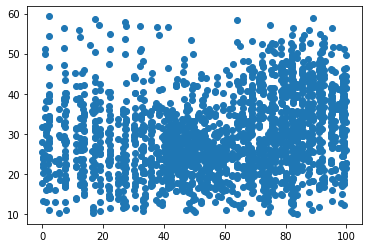

In [5]:
plt.scatter(df['100'],df['Performance'])

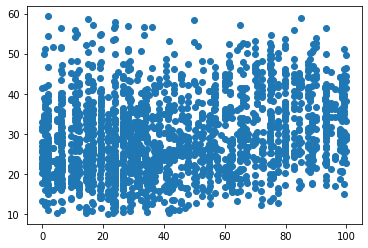

In [6]:
plt.scatter(df['110'],df['Performance'])

In [7]:
X = data[['100','Performance']]
y = data['label 100']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.30)


In [9]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
x=scaler.transform(X)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Choix Arbre de Décision

In [15]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

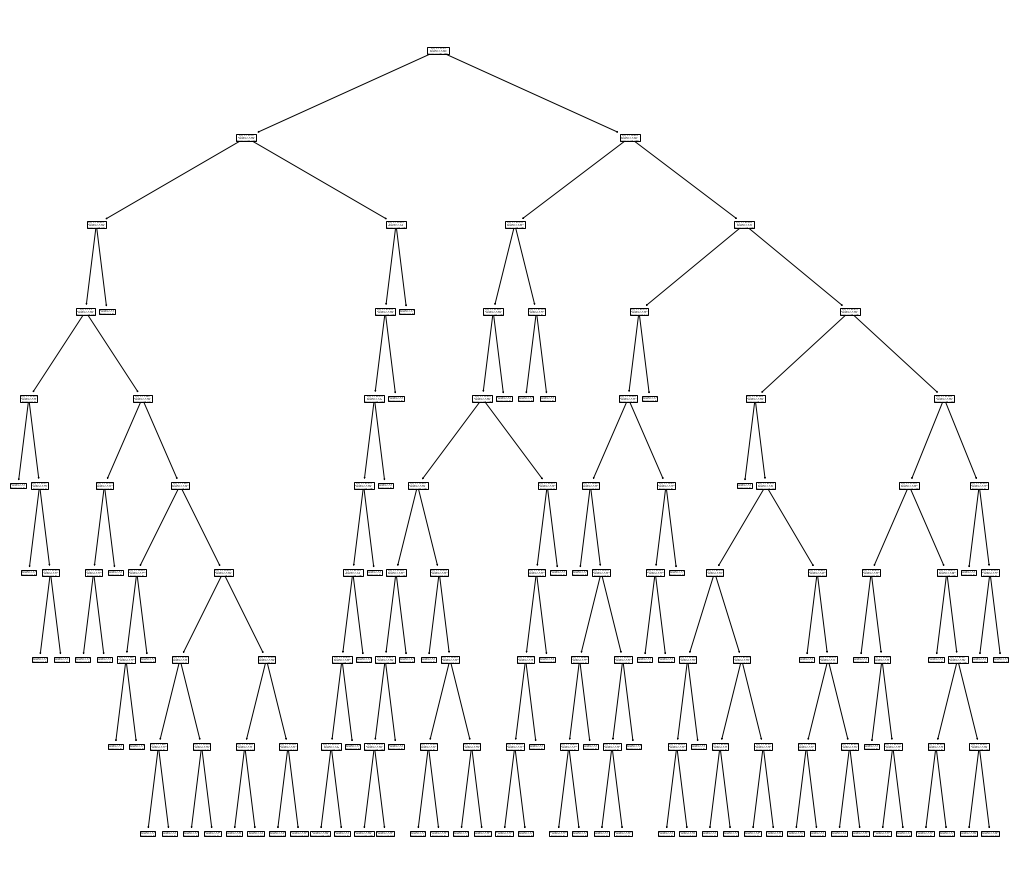

array([174,  16,  95,  10], dtype=int64)

In [89]:
# Entropy
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.15)

plt.figure(figsize=(18, 16))
clf = tree.DecisionTreeClassifier(max_depth = 9,criterion='entropy',splitter="best")
fig = clf.fit(x_train, y_train)
clf.score(x_test,y_test)
tree.plot_tree(fig)
plt.show()

prediction=clf.predict(x_test)

confusion_matrix(y_test,prediction).ravel()
#(tn, fp, fn, tp)

0.6135593220338983


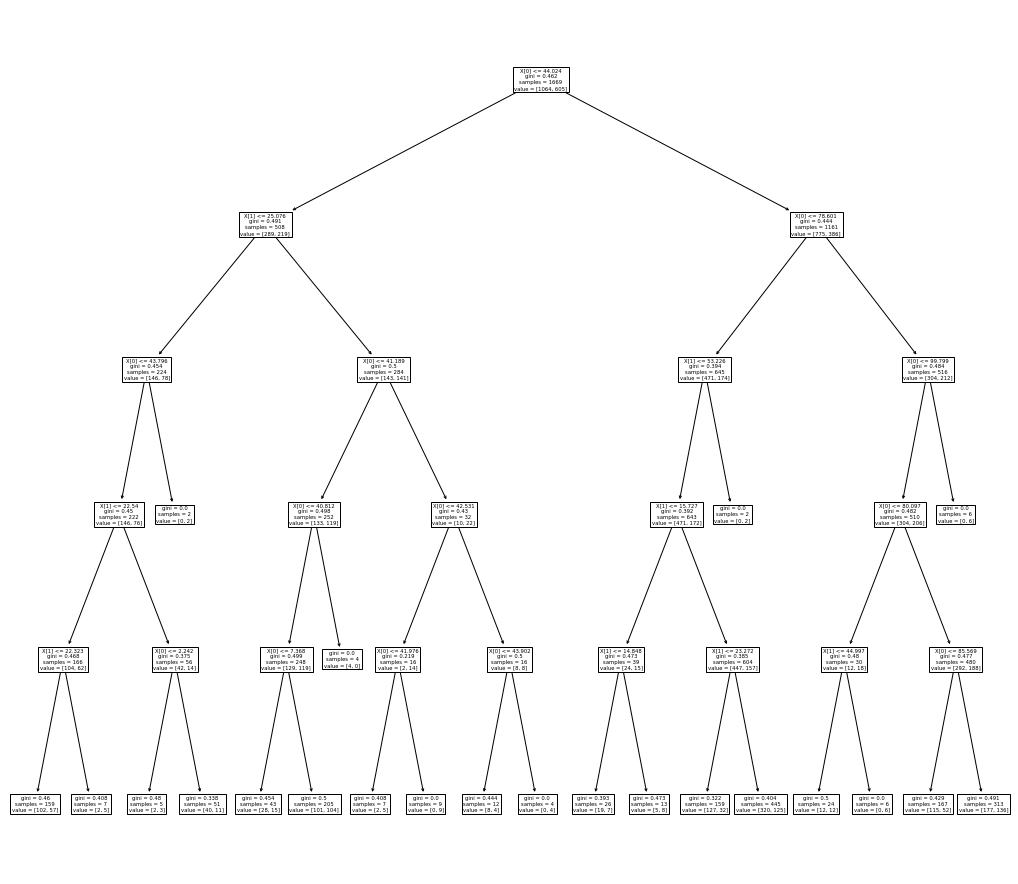

array([154,  33,  81,  27], dtype=int64)

In [83]:
# Gini, max depth
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.15)

%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.figure(figsize=(18, 16))
clf5 = DecisionTreeClassifier(max_depth = 5, splitter="best")
fig = clf5.fit(x_train,y_train)
print(clf5.score(x_test,y_test))
tree.plot_tree(fig)
plt.show()

prediction5=clf5.predict(x_test)

confusion_matrix(y_test,prediction5).ravel()
#(tn, fp, fn, tp)